<a href="https://colab.research.google.com/github/sametgirgin/ColabNotebooks/blob/main/Sustainable_Energy_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE BASICS FOR AI IN SUSTAINABILITY**

**Sustainability Framework**

- **Sustainability**
  - ➝ **Energy management**
  - ➝ **Waste reduction**
  - ➝ **Natural resource conservation**




**Data Engineering**:

* Data engineering is essential for building AI models, especially in sustainability projects like water quality monitoring, renewable energy optimization, and smart city development.

* Effective data engineering ensures that data is accurate, accessible, and usable, which is vital for making informed decisions in sustainability projects.

* Robust data engineering practices lay the groundwork for AI models to deliver meaningful insights, supporting everything from small-scale energy efficiency projects to large-scale smart city initiatives.

Our first purpose is to build a simple AI model for energy efficiency

* Dataset and Variables: The dataset includes key energy indicators such as coal production, biofuel consumption, and year. These variables help understand global energy consumption patterns and trends.

* Model Building Options: You have two options for this challenge:
Script your own code to build a model predicting energy consumption and coal production.

* Use Google Colab's generative AI features to generate code snippets based on your goals.

* Objective: The exercise aims to help us practice building AI models using real-world energy data, focusing on analyzing trends in coal production and its influence on energy consumption patterns.

## Step 1: Load Energy Usage Data into Google Colab



---

* Start by uploading your dataset to Google Colab. You can do this by using the upload feature in Colab or by loading data from Google Drive.

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the uploaded file into a DataFrame
file_name = next(iter(uploaded))  # Get the uploaded file's name
world_energy_data = pd.read_csv(file_name)

# Display the first few rows of the dataset
world_energy_data.head()


Saving World Energy Consumption.csv to World Energy Consumption (1).csv


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


## Step 2: Preprocess the Data


---

**Objective**: Clean the dataset by handling missing values and converting data types to ensure it's ready for analysis.

**Instructions**:

* Check the dataset for missing values.
* Convert key columns like biofuel_consumption to numerical data types for further analysis.
* Fiter for ['coal_production', 'biofuel_consumption', 'year', 'country']

In [ ]:
world_energy_data.dtypes

,0
country,object
year,int64
iso_code,object
population,float64
gdp,float64
...,...
wind_elec_per_capita,float64
wind_electricity,float64
wind_energy_per_capita,float64
wind_share_elec,float64


In [ ]:
# Specify the columns you want to retain
columns_to_keep = ['coal_production', 'biofuel_consumption', 'year', 'country']

# Create a new dataframe with only the specified columns
data_filtered = world_energy_data[columns_to_keep]

# Drop rows where both 'coal_production' and 'biofuel_consumption' are missing
data_cleaned = data_filtered.dropna(subset=['coal_production', 'biofuel_consumption'], how='all')

# Check if 'biofuel_consumption' column exists before converting
if 'biofuel_consumption' in data_cleaned.columns:
    # Convert 'biofuel_consumption' column to numeric (useful for analysis)
    data_cleaned['biofuel_consumption'] = pd.to_numeric(data_cleaned['biofuel_consumption'], errors='coerce')

# Display the first few rows of the cleaned dataset
data_cleaned.head()


/tmp/ipython-input-3104137639.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['biofuel_consumption'] = pd.to_numeric(data_cleaned['biofuel_consumption'], errors='coerce')


,coal_production,biofuel_consumption,year,country
23,0.0,NaN,1900,Afghanistan
24,0.0,NaN,1901,Afghanistan
25,0.0,NaN,1902,Afghanistan
26,0.0,NaN,1903,Afghanistan
27,0.0,NaN,1904,Afghanistan


## Step 3: Perform Exploratory Data Analysis (EDA)

---

**Objective**: Help students understand the dataset by generating basic statistics and visualizing trends over time.

**Instructions**:

* Use the describe() method to display summary statistics of the dataset.
* Plot a line graph to visualize biofuel consumption trends over the years.

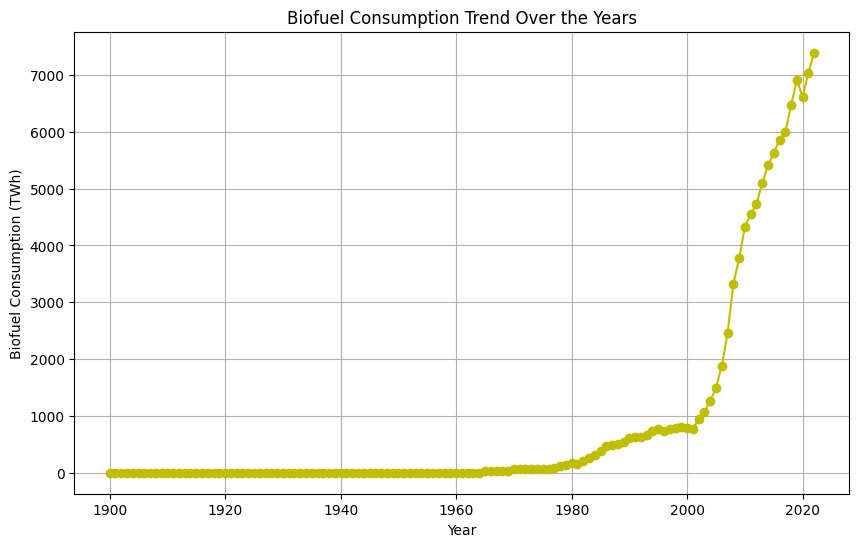

In [ ]:
# Generate summary statistics
data_cleaned.describe()

# Group data by 'year' and calculate the total biofuel consumption per year
biofuel_per_year = data_cleaned.groupby('year')['biofuel_consumption'].sum()

# Plot biofuel consumption over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(biofuel_per_year.index, biofuel_per_year.values, marker='o', linestyle='-', color='y')
plt.title('Biofuel Consumption Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Biofuel Consumption (TWh)')
plt.grid(True)
plt.show()


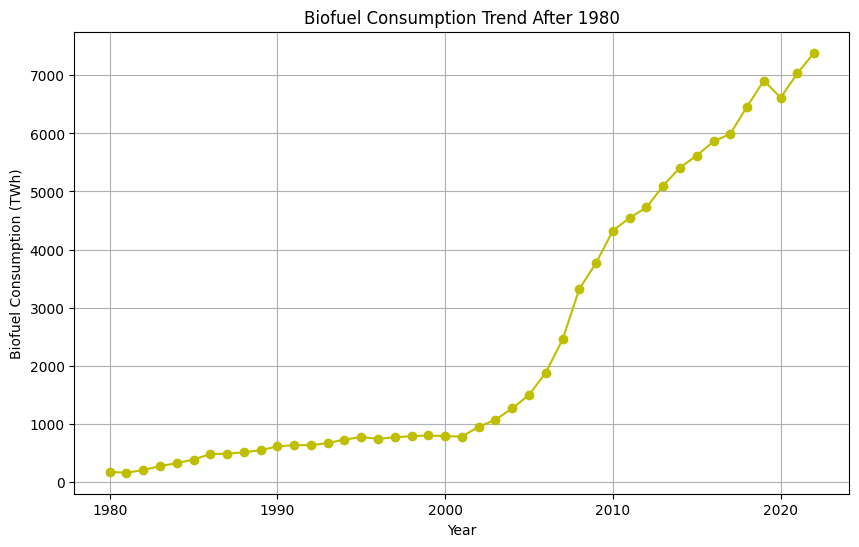

In [ ]:
# Filter data for years after 1980
biofuel_per_year_after_1980 = biofuel_per_year[biofuel_per_year.index >= 1980]

# Plot biofuel consumption over time after 1980
plt.figure(figsize=(10, 6))
plt.plot(biofuel_per_year_after_1980.index, biofuel_per_year_after_1980.values, marker='o', linestyle='-', color='y')
plt.title('Biofuel Consumption Trend After 1980')
plt.xlabel('Year')
plt.ylabel('Biofuel Consumption (TWh)')
plt.grid(True)
plt.show()

## Step 4: Analyze Data for Coal Production


---

**Objective**: Focus on coal production and analyze energy consumption trends over the years.

**Instructions**:

* Filter the dataset to include only data from coal production
* Plot the coal production over the years to understand how it has changed over time.



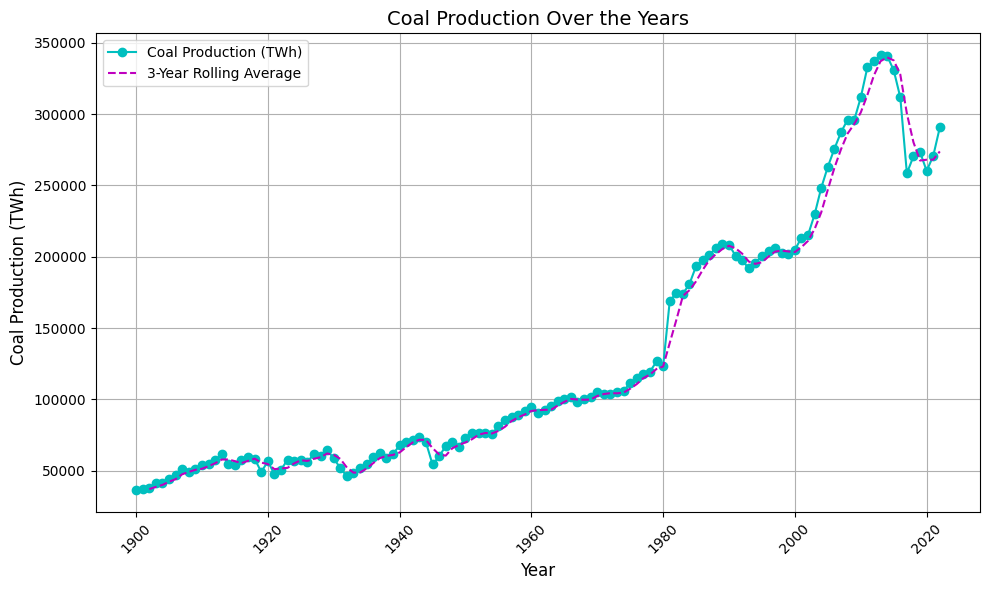

In [ ]:
# Filter the data for non-null coal production values
coal_data = data_cleaned[data_cleaned['coal_production'].notna()]

# Group by year and calculate the mean coal production per year
coal_data_grouped = coal_data.groupby('year')['coal_production'].sum().reset_index()

# Calculate a rolling average to smooth the trend-->  3 years
coal_data_grouped['coal_production_smooth'] = coal_data_grouped['coal_production'].rolling(window=3).mean()

# Plot the coal production over the years with a rolling average
plt.figure(figsize=(10, 6))
plt.plot(coal_data_grouped['year'], coal_data_grouped['coal_production'], label='Coal Production (TWh)', marker='o', linestyle='-', color='c')
plt.plot(coal_data_grouped['year'], coal_data_grouped['coal_production_smooth'], label='3-Year Rolling Average', linestyle='--', color='m')

# Customize the plot
plt.title('Coal Production Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Coal Production (TWh)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()



## Step 5: Apply AI Techniques for Trend Analysis on Global Coal Production (1980-2020)



---


**Objective**: Use AI techniques to analyze global coal production trends from 1980 to 2020, excluding values below 10,000 TWh.

**Instructions**:

* Filter the dataset to include coal production data between 1980 and 2020.
* Remove any coal production values below 10,000 TWh.
* Use linear regression to analyze the trend in coal production over time.
* Visualize the actual coal production values and the predicted trend for the selected years.

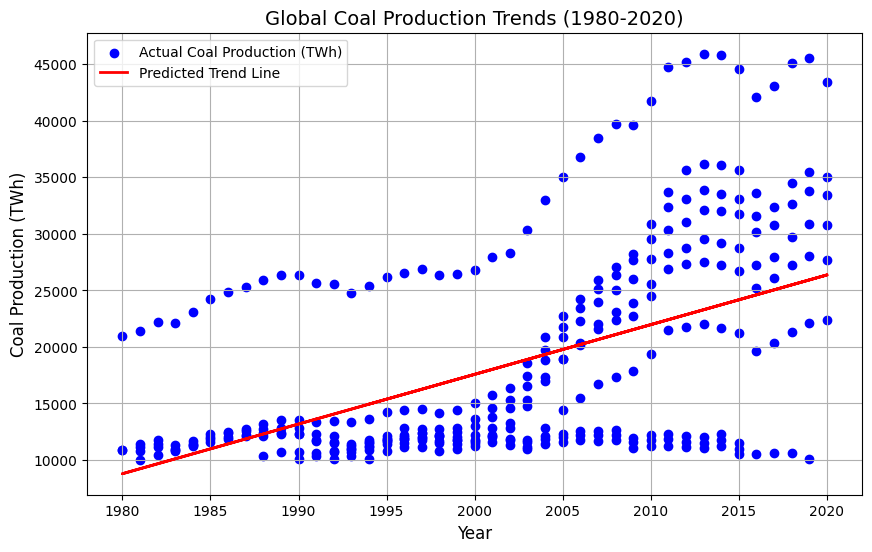

In [ ]:
# Filter data for global coal production between 1980 and 2020, and remove values below 10,000 TWh
filtered_coal_data = data_cleaned[(data_cleaned['year'] >= 1980) &
                                  (data_cleaned['year'] <= 2020) &
                                  (data_cleaned['coal_production'] >= 10000)]

import numpy as np
# Reshape the data for modeling
X = np.array(filtered_coal_data['year']).reshape(-1, 1)
y = np.array(filtered_coal_data['coal_production']).reshape(-1, 1)

# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the actual coal production and predicted trend line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Coal Production (TWh)')
plt.plot(X, model.predict(X), color='red', label='Predicted Trend Line', linewidth=2)

# Customize the plot
plt.title('Global Coal Production Trends (1980-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Coal Production (TWh)', fontsize=12)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

## Step 6: Simulate Coal Production (2021-2030)



---
**Objective**: Forecast coal production using historical data from 2000 onwards and generate predictions for the years 2021 to 2030.

**Instructions**:
* Filter the Dataset: First, ensure the dataset only contains coal production data from 2000 onwards and excludes any values below 10,000 TWh.

* Create a Trend Prediction Model: Use linear regression or another time-series forecasting method to predict coal production from 2021 to 2030 based on the data from 2000 to 2020.

* Generate Predictions: Use the model to simulate coal production for 2021–2030.

* Plot the Results: Visualize the historical coal production data alongside the simulated values for 2021–2030.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

# Assuming your dataset is named 'coal_data' and contains 'year' and 'coal_production' columns

# Filter the dataset for years 2000 onwards and coal production >= 10000 TWh
coal_data_filtered = coal_data[(coal_data['year'] >= 2000) & (coal_data['coal_production'] >= 10000)]

# Prepare the data for modeling
X = coal_data_filtered['year'].values.reshape(-1, 1)  # Years as the independent variable
y = coal_data_filtered['coal_production'].values  # Coal production as the dependent variable

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict coal production from 2021 to 2030
years_to_predict = np.arange(2021, 2031).reshape(-1, 1)
predicted_coal_production = model.predict(years_to_predict)

# Create a DataFrame for the predicted data
predicted_data = pd.DataFrame({
    'year': years_to_predict.flatten(),
    'coal_production': predicted_coal_production
})

# Combine with the historical data
combined_data = pd.concat([coal_data_filtered, predicted_data])

# Create Plotly figure
fig = go.Figure()

# Add historical data scatter plot
fig.add_trace(go.Scatter(x=coal_data_filtered['year'], y=coal_data_filtered['coal_production'],
                         mode='markers', name='Historical Coal Production (TWh)',
                         marker=dict(color='black')))

# Add predicted data line plot
fig.add_trace(go.Scatter(x=predicted_data['year'], y=predicted_data['coal_production'],
                         mode='lines+markers', name='Predicted Coal Production (2021-2030)',
                         line=dict(color='green'), marker=dict(color='green')))

# Customize the layout
fig.update_layout(
    title='Global Coal Production Predictions (2000-2030)',
    xaxis_title='Year',
    yaxis_title='Coal Production (TWh)',
    legend=dict(x=0.01, y=0.99),
    hovermode='x unified'
)

# Display the plot
fig.show()

# Display the predicted values for 2021-2030
print(predicted_data)

   year  coal_production
0  2021     32677.433916
1  2022     33561.667475
2  2023     34445.901035
3  2024     35330.134595
4  2025     36214.368154
5  2026     37098.601714
6  2027     37982.835273
7  2028     38867.068833
8  2029     39751.302393
9  2030     40635.535952


# Advance Data Collection Techniques


In this challenge, we will simulate IoT data streams to design a data collection strategy for a local environment.




##Step 1: Simulate IoT Data Streams in Google Colab


---


**Objective**: Create simulated IoT data to represent environmental conditions.

**Outcome**: A DataFrame containing simulated IoT data.

**Explanation**: Simulating IoT data allows us to create a realistic dataset representing various environmental conditions. This data will be used to understand patterns and anomalies in the local environment.

In [ ]:
import numpy as np
import pandas as pd

# Simulate IoT data
np.random.seed(42)
timestamps = pd.date_range(start='2022-01-01', periods=1000, freq='H')
temperature = np.random.normal(loc=20, scale=5, size=len(timestamps))
humidity = np.random.normal(loc=50, scale=10, size=len(timestamps))
co2_levels = np.random.normal(loc=400, scale=50, size=len(timestamps))

# Create a DataFrame
iot_data = pd.DataFrame({
    'timestamp': timestamps,
    'temperature': temperature,
    'humidity': humidity,
    'co2_levels': co2_levels
})

# Display the first few rows
iot_data.head()


/tmp/ipython-input-1795194188.py:6: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



,timestamp,temperature,humidity,co2_levels
0,2022-01-01 00:00:00,22.483571,63.993554,366.241086
1,2022-01-01 01:00:00,19.308678,59.246337,392.774066
2,2022-01-01 02:00:00,23.238443,50.596304,360.379004
3,2022-01-01 03:00:00,27.615149,43.530632,384.601924
4,2022-01-01 04:00:00,18.829233,56.982233,305.319267


##Visualization 1: Plot the Raw IoT Data to Visualize Initial Data Patterns


---


**Objective**: Visualize the simulated IoT data to understand its initial patterns.

**Outcome**: Line plots showing temperature, humidity, and CO2 levels over time.

**Explanation**: Visualizing the raw IoT data helps to identify initial patterns and trends in the environmental conditions, which is crucial for further analysis and processing.

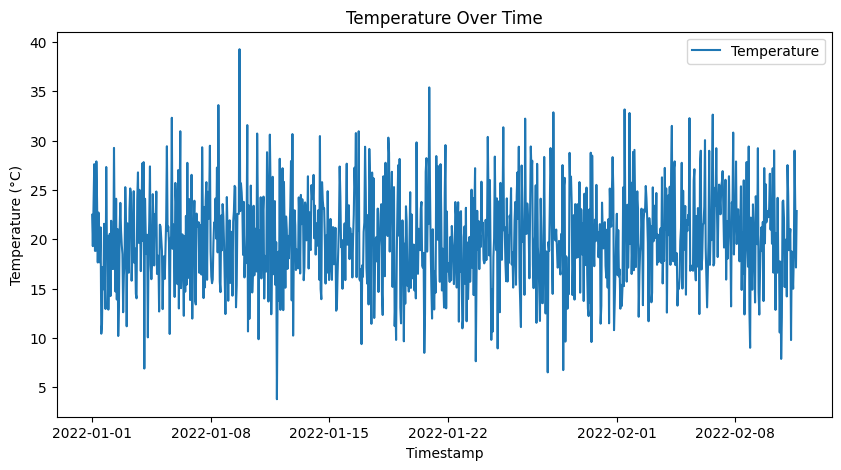

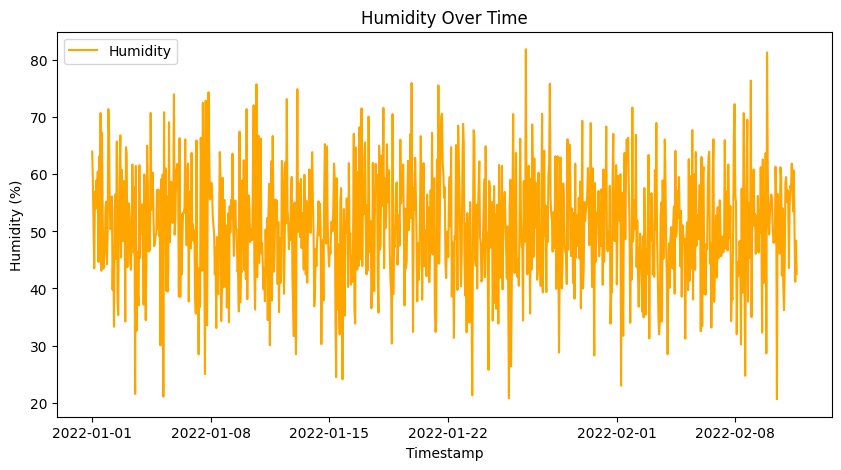

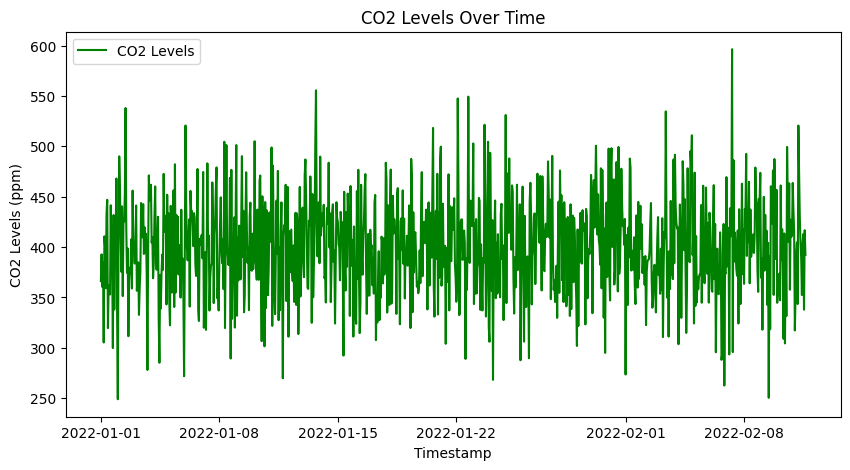

In [ ]:
import matplotlib.pyplot as plt

# Plot temperature over time
plt.figure(figsize=(10, 5))
plt.plot(iot_data['timestamp'], iot_data['temperature'], label='Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

# Plot humidity over time
plt.figure(figsize=(10, 5))
plt.plot(iot_data['timestamp'], iot_data['humidity'], label='Humidity', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Humidity (%)')
plt.title('Humidity Over Time')
plt.legend()
plt.show()

# Plot CO2 levels over time
plt.figure(figsize=(10, 5))
plt.plot(iot_data['timestamp'], iot_data['co2_levels'], label='CO2 Levels', color='green')
plt.xlabel('Timestamp')
plt.ylabel('CO2 Levels (ppm)')
plt.title('CO2 Levels Over Time')
plt.legend()
plt.show()


## Step 2: Process and Store the Data Using Python Libraries


---


**Objective**: Clean and process the IoT data to make it suitable for analysis.

**Outcome**: A cleaned and processed dataset ready for analysis.

**Explanation**: Data cleaning and processing are essential steps to ensure the quality and accuracy of the dataset. This involves handling missing values, removing outliers, and normalizing the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(iot_data.isnull().sum())

# Handle missing values if any (for example, filling with the mean value)
iot_data.fillna(iot_data.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
iot_data[['temperature', 'humidity', 'co2_levels']] = scaler.fit_transform(iot_data[['temperature', 'humidity', 'co2_levels']])

# Display the first few rows of the cleaned data
iot_data.head()


timestamp      0
temperature    0
humidity       0
co2_levels     0
dtype: int64


,timestamp,temperature,humidity,co2_levels
0,2022-01-01 00:00:00,0.487759,1.332576,-0.692816
1,2022-01-01 01:00:00,-0.161022,0.856405,-0.152959
2,2022-01-01 02:00:00,0.642015,-0.011240,-0.812090
3,2022-01-01 03:00:00,1.536382,-0.719965,-0.319235
4,2022-01-01 04:00:00,-0.258995,0.629303,-1.932372


## Visualization 2: Visualize Cleaned and Processed Data to Identify Patterns or Anomalies


---


**Objective**: Visualize the cleaned IoT data to identify patterns or anomalies.

**Outcome**: Line plots showing the standardized environmental data over time.

**Explanation**: Visualizing the cleaned data helps in identifying significant patterns or anomalies that may not be visible in the raw data.

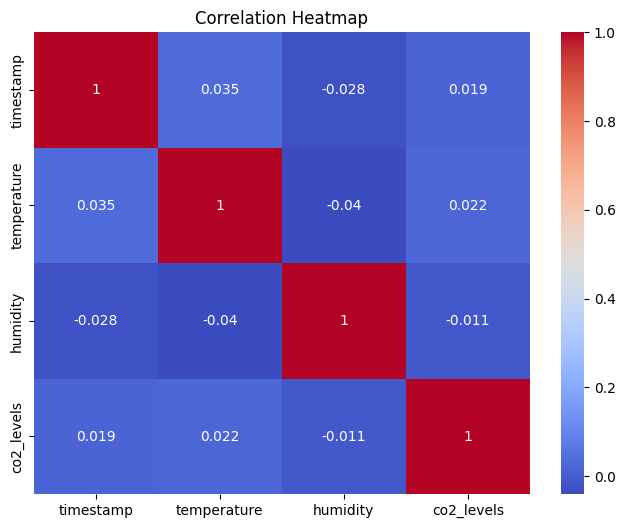

In [ ]:
import seaborn as sns

# Create a heatmap to show the correlation between different features
plt.figure(figsize=(8, 6))
sns.heatmap(iot_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Visualization 3: Box Plot to Identify Outliers in the Data


---


**Objective**: Identify the distribution and potential outliers in the cleaned data.

**Outcome**: Box plots for temperature, humidity, and CO2 levels.

**Explanation**: Box plots help in visualizing the spread of the data and identifying any outliers that may exist.

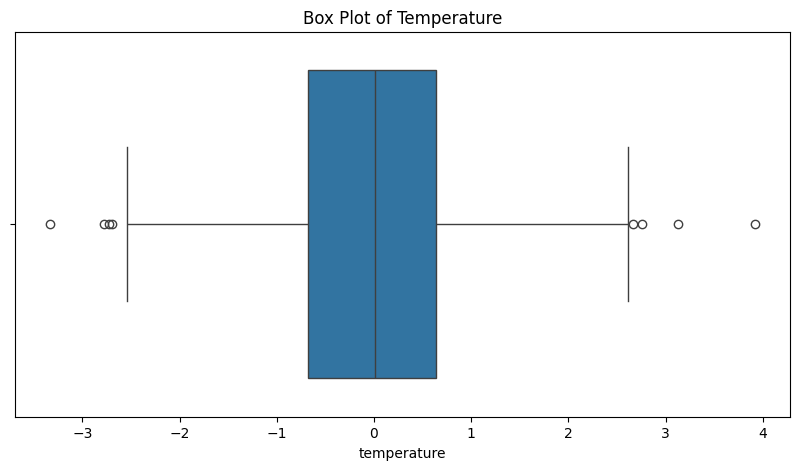

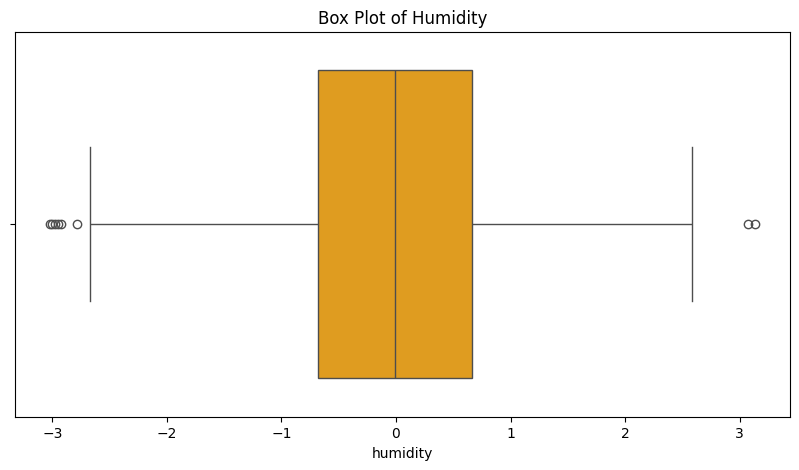

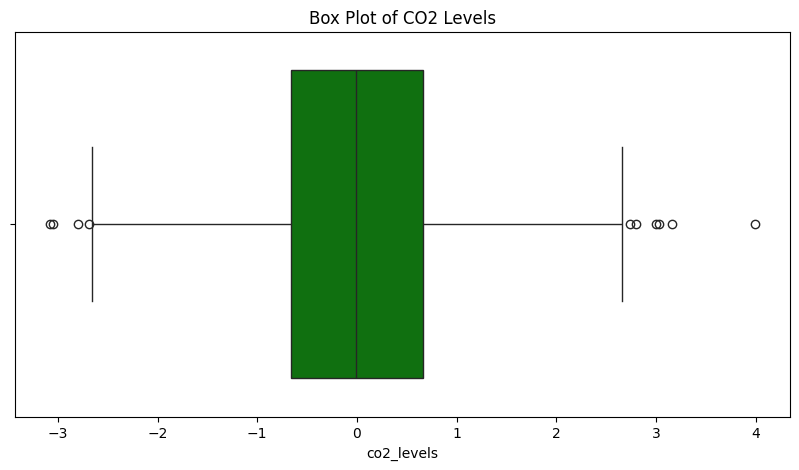

In [ ]:
# Box plot for temperature
plt.figure(figsize=(10, 5))
sns.boxplot(x=iot_data['temperature'])
plt.title('Box Plot of Temperature')
plt.show()

# Box plot for humidity
plt.figure(figsize=(10, 5))
sns.boxplot(x=iot_data['humidity'], color='orange')
plt.title('Box Plot of Humidity')
plt.show()

# Box plot for CO2 levels
plt.figure(figsize=(10, 5))
sns.boxplot(x=iot_data['co2_levels'], color='green')
plt.title('Box Plot of CO2 Levels')
plt.show()


##Step 3: Save the Processed Data for Later Use
**Objective**: Save the cleaned and processed data for future analysis and integration into the final project.

**Outcome**: A CSV file containing the processed IoT data.

**Explanation**: Saving the processed data ensures that it can be easily accessed and used in subsequent tasks and projects.

In [ ]:
# Save the cleaned and processed data to a CSV file
iot_data.to_csv('processed_iot_data.csv', index=False)


# Implementing Sustainable AI Solutions:

In this challenge, lets develop an AI model to predict water needs, which can aid in effective water management and conservation efforts.


## Step 1: Load Water Usage Data into Google Colab


---


**Objective**: Load the water usage data into Google Colab for analysis and modeling.

**Outcome**: A DataFrame containing the water usage data.

**Instructions**:

* Upload the water quality dataset to your Google Colab environment.
* Load the dataset into a DataFrame.



In [ ]:
import pandas as pd

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
water_data = pd.read_csv("water_potability.csv")

# Display the first few rows
water_data.head()


Saving water_potability.csv to water_potability.csv


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Visualization 1: Plot the Water Usage Data Distribution


---


**Objective**: Visualize the distribution of water usage data to understand its characteristics.

**Outcome**: A histogram plot showing the distribution of water usage data.

**Instructions**:

* Create a histogram plot to visualize the distribution of water usage.

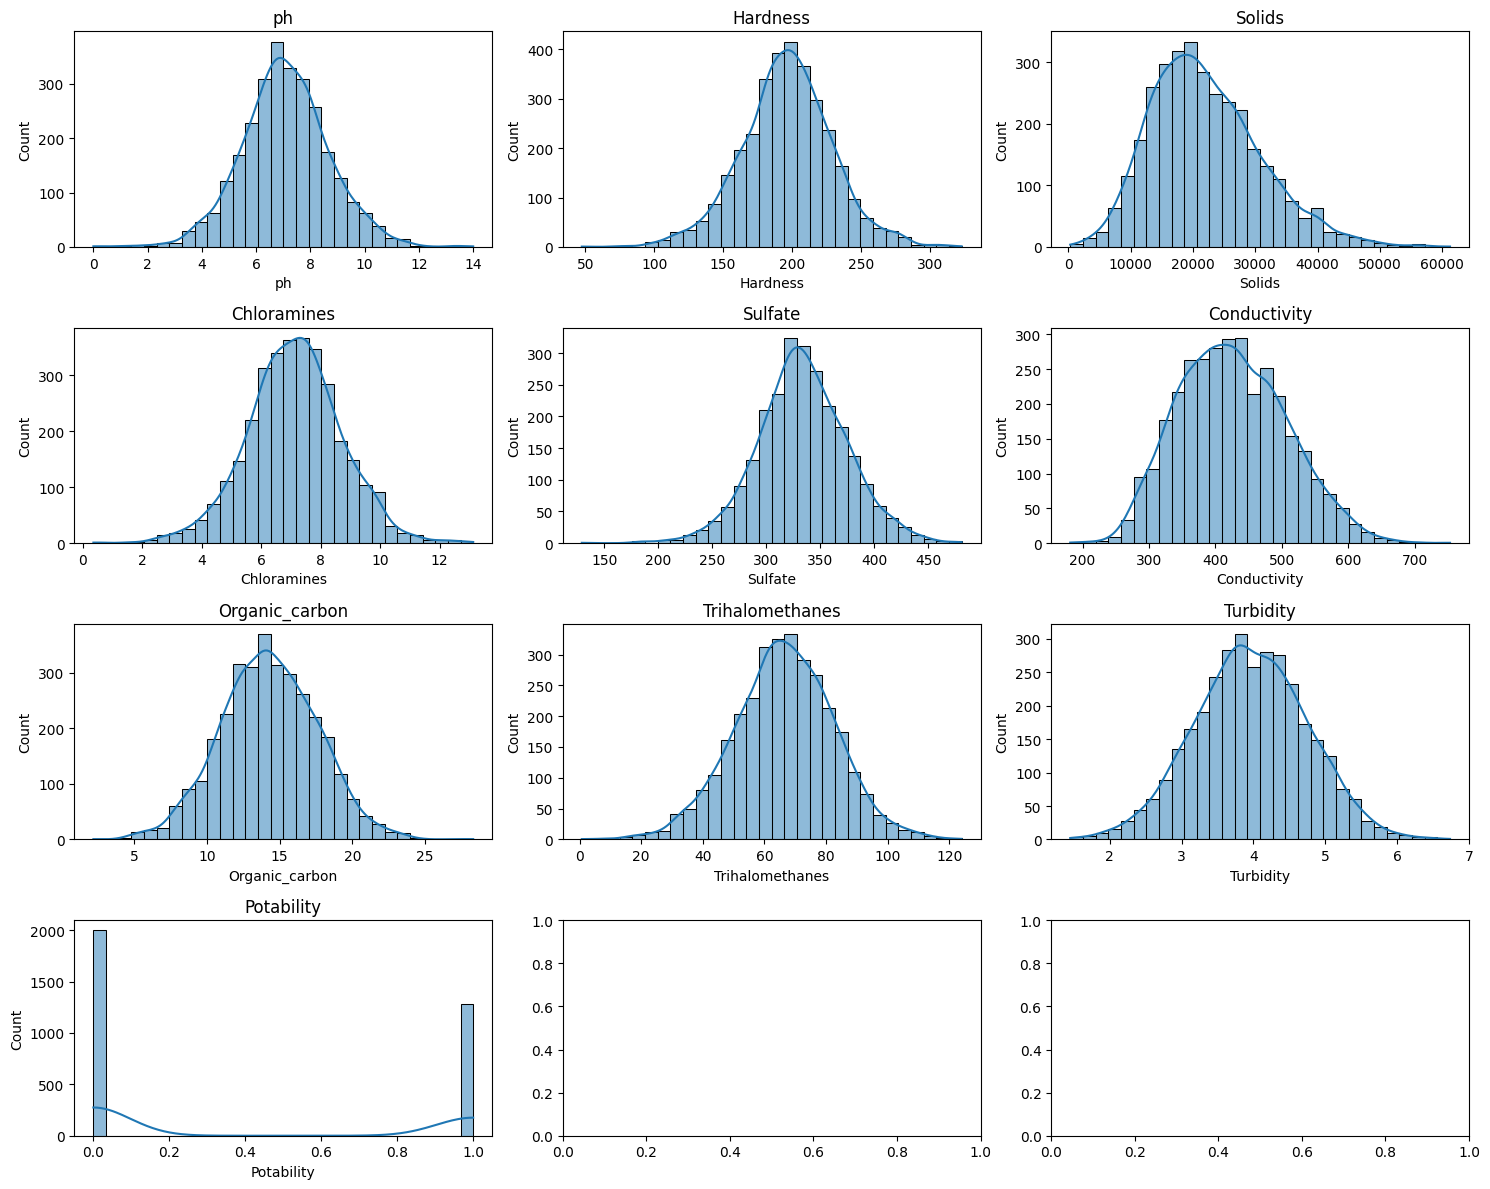

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of all features
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(water_data.columns):
    sns.histplot(water_data[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


## Step 2: Process and Prepare Data


---



**Objective**: Prepare the data for training by handling missing values and standardizing features.

**Outcome**: Cleaned and standardized dataset ready for model training.

**Instructions**:

* Handle missing values by dropping them or imputing.
* Standardize the features to ensure all are on a similar scale.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values
water_data = water_data.dropna()

# Separate features and target variable
X = water_data.drop('Potability', axis=1)
y = water_data['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Step 3: Create a Simple AI Model Using TensorFlow to Predict Water Potability

---

**Objective**: Build a neural network model to predict water potability.

**Outcome**: A basic neural network model for predicting water potability.

**Instructions**:

* Build and compile the model.
* Train the model on the training data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5803 - loss: 0.6838 - val_accuracy: 0.6180 - val_loss: 0.6642
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6368 - loss: 0.6418 - val_accuracy: 0.6335 - val_loss: 0.6664
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6220 - loss: 0.6543 - val_accuracy: 0.6366 - val_loss: 0.6410
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6916 - loss: 0.6195 - val_accuracy: 0.6832 - val_loss: 0.6277
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6707 - loss: 0.6031 - val_accuracy: 0.6863 - val_loss: 0.6149
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7061 - loss: 0.5795 - val_accuracy: 0.6708 - val_loss: 0.6153
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7066 - loss: 0.5798 - val_accuracy: 0.6739 - val_loss: 0.6097
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7089 - loss: 0.5594 - val_accuracy: 0.65

## Visualization 2: Visualize the Training Process


---


**Objective**: Monitor the model’s performance during training.


**Outcome**:  Line plots showing the training and validation loss over epochs.

**Instructions**:

* Plot the training and validation loss.





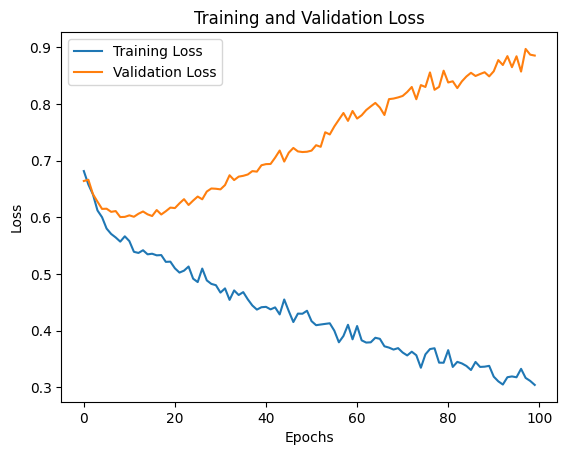

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## Step 4: Document the Model's Performance and Prepare It for Integration

---

**Objective**: Evaluate the model and document its performance.

**Outcome**: Model evaluation metrics and preparations for integration into the final project.

**Instructions**:

* Evaluate the model on the test set.
* Prepare the model for integration.


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Save the model for later use
model.save('water_potability_model.h5')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6717 - loss: 0.7776 


Test Accuracy: 0.6551


## Visualization 3:  Plot a Confusion Matrix to Evaluate the Model's Effectiveness


---


**Objective**: Evaluate the performance of the classification model using a confusion matrix.

**Outcome**: Confusion matrix showing the number of correct and incorrect predictions for each class.

**Instructions**:

* Generate predictions on the test set.
* Create a confusion matrix to visualize the performance.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


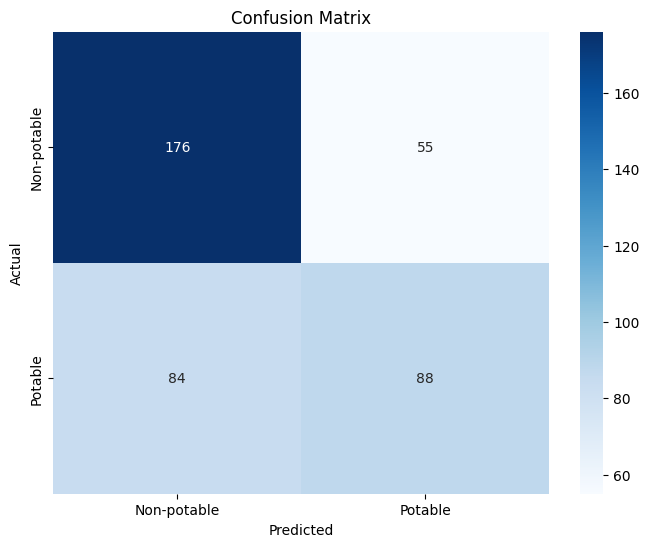

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-potable', 'Potable'], yticklabels=['Non-potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Step 5: Refine the Model Further

---

**Objective**: Improve the model's accuracy by experimenting with different architectures and hyperparameters.

**Outcome**: A potentially more accurate model with better predictive performance.

**Instructions**:

* Experiment with additional hidden layers, different activation functions, or more epochs.
* Evaluate the changes in performance and document the results.

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5748 - loss: 0.6783 - val_accuracy: 0.6522 - val_loss: 0.6731
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6331 - loss: 0.6635 - val_accuracy: 0.6366 - val_loss: 0.6428
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6477 - loss: 0.6312 - val_accuracy: 0.6646 - val_loss: 0.6238
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6832 - loss: 0.5957 - val_accuracy: 0.6925 - val_loss: 0.6085
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6871 - loss: 0.5776 - val_accuracy: 0.6894 - val_loss: 0.5979
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6785 - loss: 0.5885 - val_accuracy: 0.6708 - val_loss: 0.6060
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7121 - loss: 0.5745 - val_accuracy: 0.6832 - val_loss: 0.6002
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7126 - loss: 0.5368 - val_accuracy: 0.6863 - val_loss: 0.

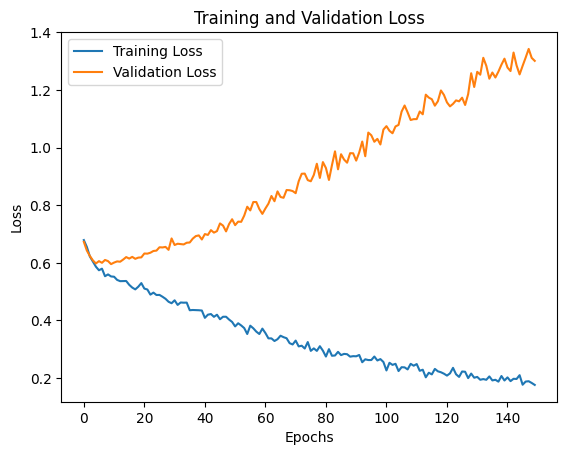

In [ ]:
# Example: Add more hidden layers and use a different activation function
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2, batch_size=32)

# Re-evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Refined Test Accuracy: {accuracy:.4f}")

# Visualize the training process again
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## Visualization 4: Evaluate Model Improvements with Confusion Matrix
**Objective**: Understand the improvements in classification performance through a refined confusion matrix.

**Outcome**: Updated confusion matrix showing true positives, true negatives, false positives, and false negatives with the refined model.

**Instructions**:

* Plot the confusion matrix to visualize the classification performance after refining the model.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


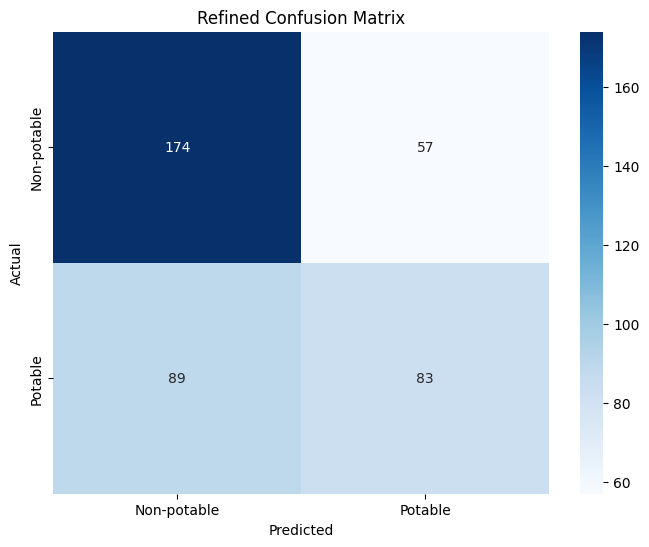

In [ ]:
# Make new predictions with the refined model
y_pred_refined = model.predict(X_test)
y_pred_refined = (y_pred_refined > 0.5).astype(int).flatten()

# Compute new confusion matrix
conf_matrix_refined = confusion_matrix(y_test, y_pred_refined)

# Plot refined confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_refined, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-potable', 'Potable'], yticklabels=['Non-potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Refined Confusion Matrix')
plt.show()

# Optimization and Automation

In this challenge, we aim to automate an energy-saving system using AI models in Google Colab. Here are the detailed steps and their objectives:

## Step 1: Load Energy Usage Data into Google Colab
**Explanation**: Load the HVAC energy usage dataset from Kaggle into Google Colab to begin the analysis and modeling process.

**Outcome**: A DataFrame containing HVAC energy usage data.

**Instructions**:
* Go to Kaggle and download the "Energy-consumption-prediction"
* Upload the dataset to your Google Colab environment.



In [ ]:
import pandas as pd
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the dataset
energy_data = pd.read_csv("Energy_consumption.csv")

# Check the columns in the dataset
energy_data.columns

# Display the first few rows
energy_data.head()


Saving Energy_consumption.csv to Energy_consumption (1).csv


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [ ]:
energy_data.shape

(1000, 11)

##Visualization 1: Plot Energy Usage Patterns to Understand the Data

**Explanation**: Visualize the energy usage data to identify patterns and anomalies.

**Outcome**: Line plot showing the energy usage patterns over time.

**Instructions**:
* Use Matplotlib and Seaborn libraries for visualization.
* Create a line plot for energy usage patterns

--

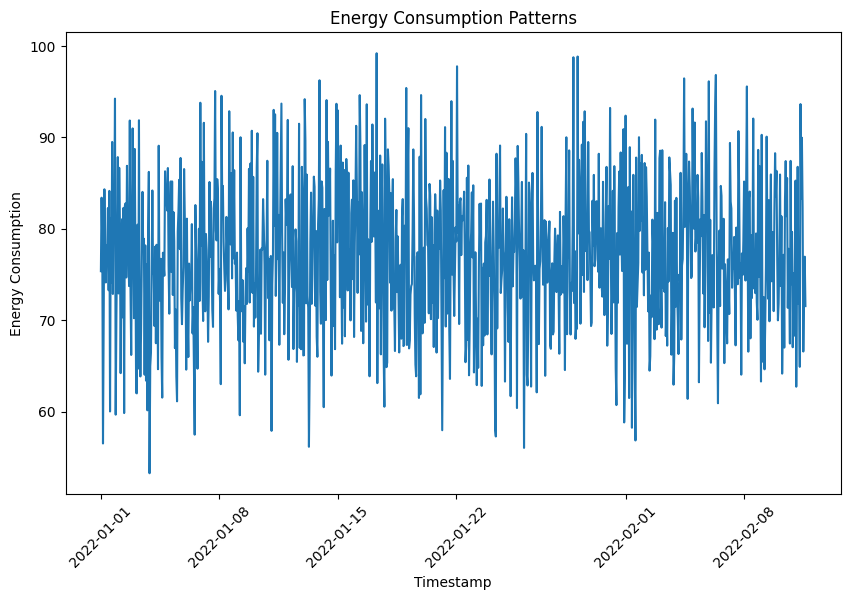

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Timestamp' to datetime format
energy_data['Timestamp'] = pd.to_datetime(energy_data['Timestamp'])

# Plot the distribution of energy consumption
plt.figure(figsize=(10, 6))
sns.lineplot(data=energy_data, x='Timestamp', y='EnergyConsumption')
plt.title('Energy Consumption Patterns')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Step 2: Process and Prepare Data


---


**Explanation**: Prepare the data by separating features and target variable, and standardize the features.

**Outcome**: Prepared and standardized data ready for model training.

**Instructions**:

* Convert categorical data to numeric.
* Split the data into training and testing sets.
* Standardize the features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert categorical data to numeric
energy_data['DayOfWeek'] = energy_data['DayOfWeek'].astype('category').cat.codes
energy_data['Holiday'] = energy_data['Holiday'].astype('category').cat.codes

# Prepare the data by separating features and target variable
X = energy_data.drop(['Timestamp', 'EnergyConsumption'], axis=1)
y = energy_data['EnergyConsumption']

# Convert any non-numeric columns to numeric (e.g., 'Off' to 0 and 'On' to 1)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].map({'Off': 0, 'On': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Step 3: Use TensorFlow to Create a Model Predicting Energy Usage


---

**Explanation**: Build a neural network model using TensorFlow to predict energy consumption based on the dataset.

**Outcome**: A trained neural network model that predicts energy consumption.

**Instructions**:
* Prepare the data by separating features and the target variable.
* Split the data into training and testing sets.
* Standardize the features.
* Build, compile, and train the neural network model.

---



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5882.5664 - mae: 76.2941 - val_loss: 5457.6943 - val_mae: 73.3887
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5114.8345 - mae: 71.0483 - val_loss: 3982.7532 - val_mae: 62.5736
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3263.4248 - mae: 56.2637 - val_loss: 1180.5857 - val_mae: 33.2136
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 715.4080 - mae: 23.7285 - val_loss: 150.6358 - val_mae: 9.5699
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 229.0182 - mae: 11.7155 - val_loss: 110.1084 - val_mae: 8.3249
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 168.9520 - mae: 10.3838 - val_loss: 101.6808 - val_mae: 7.9807
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 149.1483 - mae: 9.7639 - val_loss: 95.8851 - val_mae: 7.7094
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 159.7178 - mae: 10.2945 - val_loss: 89.7737 - val_mae: 7.4411
Epoch 9/100
20/20

## Visualization 2: Visualize the Relationship Between Energy Consumption and Other Features Using Pair Plots

**Explanation**: Visualize the relationship between energy consumption and other numerical features using pair plots.

**Outcome**: Pair plots showing the relationships between energy consumption and other features.

**Instructions**:

* Create pair plots to visualize the relationships between energy consumption and other features.

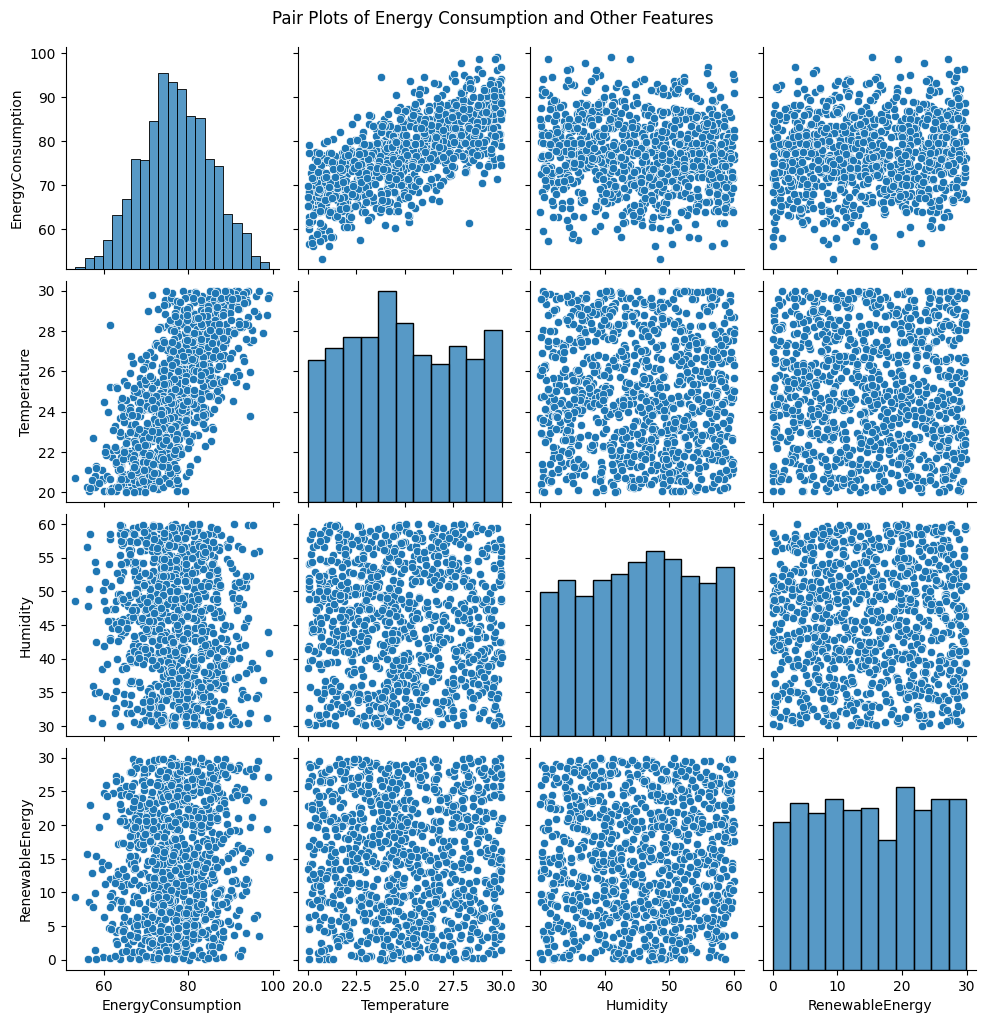

In [ ]:
sns.pairplot(energy_data[['EnergyConsumption', 'Temperature', 'Humidity', 'HVACUsage', 'LightingUsage', 'RenewableEnergy']])
plt.suptitle('Pair Plots of Energy Consumption and Other Features', y=1.02)
plt.show()


##Step 4: Automate the System to Make Real-Time Adjustments Based on Data

---

**Explanation**: Implement automation to adjust energy consumption in real-time based on predictions.

**Outcome**: Automated system making real-time adjustments.

**Instructions**:
* Develop a function to simulate real-time adjustments based on the model’s predictions.
* Integrate this function into the system to adjust energy usage dynamically.

In [ ]:
def adjust_energy_usage(predicted_usage):
    if predicted_usage > 80:
        return "Decrease HVAC usage"
    elif predicted_usage < 60:
        return "Increase HVAC usage"
    else:
        return "Maintain current settings"

# Make predictions and apply adjustments
adjustments = [adjust_energy_usage(model.predict(X_test[i].reshape(1, -1))[0][0]) for i in range(len(X_test))]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

## Step 5: Document the Model's Performance and Prepare It for Integration
---

**Explanation**: Evaluate the model's performance and save it for future use.

**Outcome**: A saved model file and documented performance metrics.

**Instructions**:

* Evaluate the model on the test set.
* Save the model.
* Document the performance metrics.

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Save the model for later use
model.save('energy_consumption_model.h5')


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 30.9872 - mae: 4.5971 


Test Loss: [32.98200988769531, 4.608804702758789]


## Visualization 3: Plot Actual vs. Predicted Energy Consumption

**Explanation**: Visualize the model's predictions compared to the actual energy consumption values to assess its performance.

**Outcome**: A scatter plot showing the actual vs. predicted energy consumption with a diagonal line representing perfect predictions.

**Instructions**:

* Make predictions on the test set.
* Create a scatter plot to compare predicted vs. actual energy consumption.
* Add a diagonal line representing the average energy consumption across all points.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


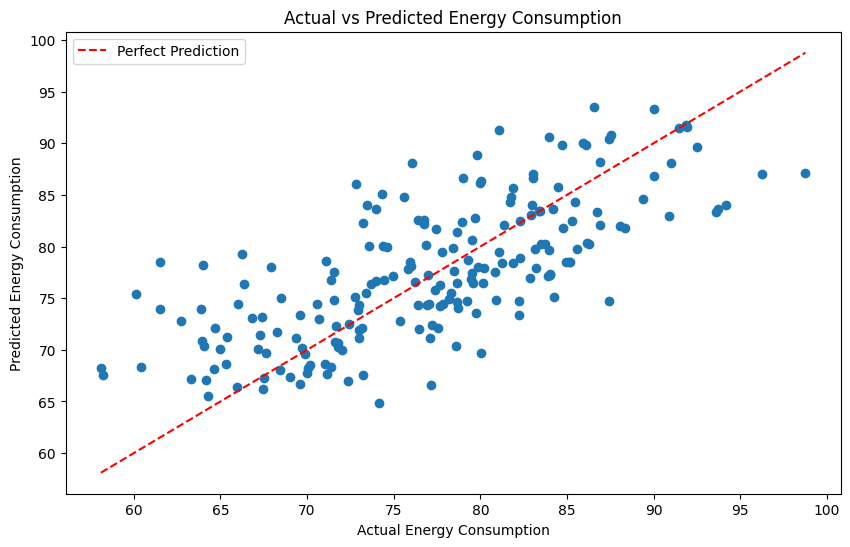

In [ ]:
# Make predictions
y_pred = model.predict(X_test).flatten()

# Plot actual vs predicted energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')

# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.show()


# Applications of AI in Smart Cities

Challenge: Smart City Performance Analysis and Recommendations

## Step 1: Load and Understand the Data


---


**Explanation**:
Understand the structure and contents of the dataset to ensure the correct columns are being used for analysis and visualization.

**Outcome**:
A clear understanding of the dataset's structure, columns, and data types.

**Instructions**:

* Load the dataset.
* Display the first few rows and data types of each column to understand the data structure.


In [ ]:
# Step 1: Load Air Quality Data into Google Colab
import pandas as pd

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
smart_city_data = pd.read_csv("Smart_City_index_india.csv")

# Display the first few rows
smart_city_data.head()

Saving Smart_City_index_India.csv to Smart_City_index_India.csv


,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340


In [ ]:
smart_city_data.shape

(102, 11)

## Step 2: Rank Cities Based on Smart City Index


---


**Explanation**:
Rank cities based on their SmartCity_Index to identify the top-performing and lower-performing cities.

**Outcome**:
A ranked list of cities based on their SmartCity_Index.

**Instructions**:

* Rank cities based on SmartCity_Index.
* Sort the data by rank.
* Create a bar plot of city rankings.

/tmp/ipython-input-1386597922.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




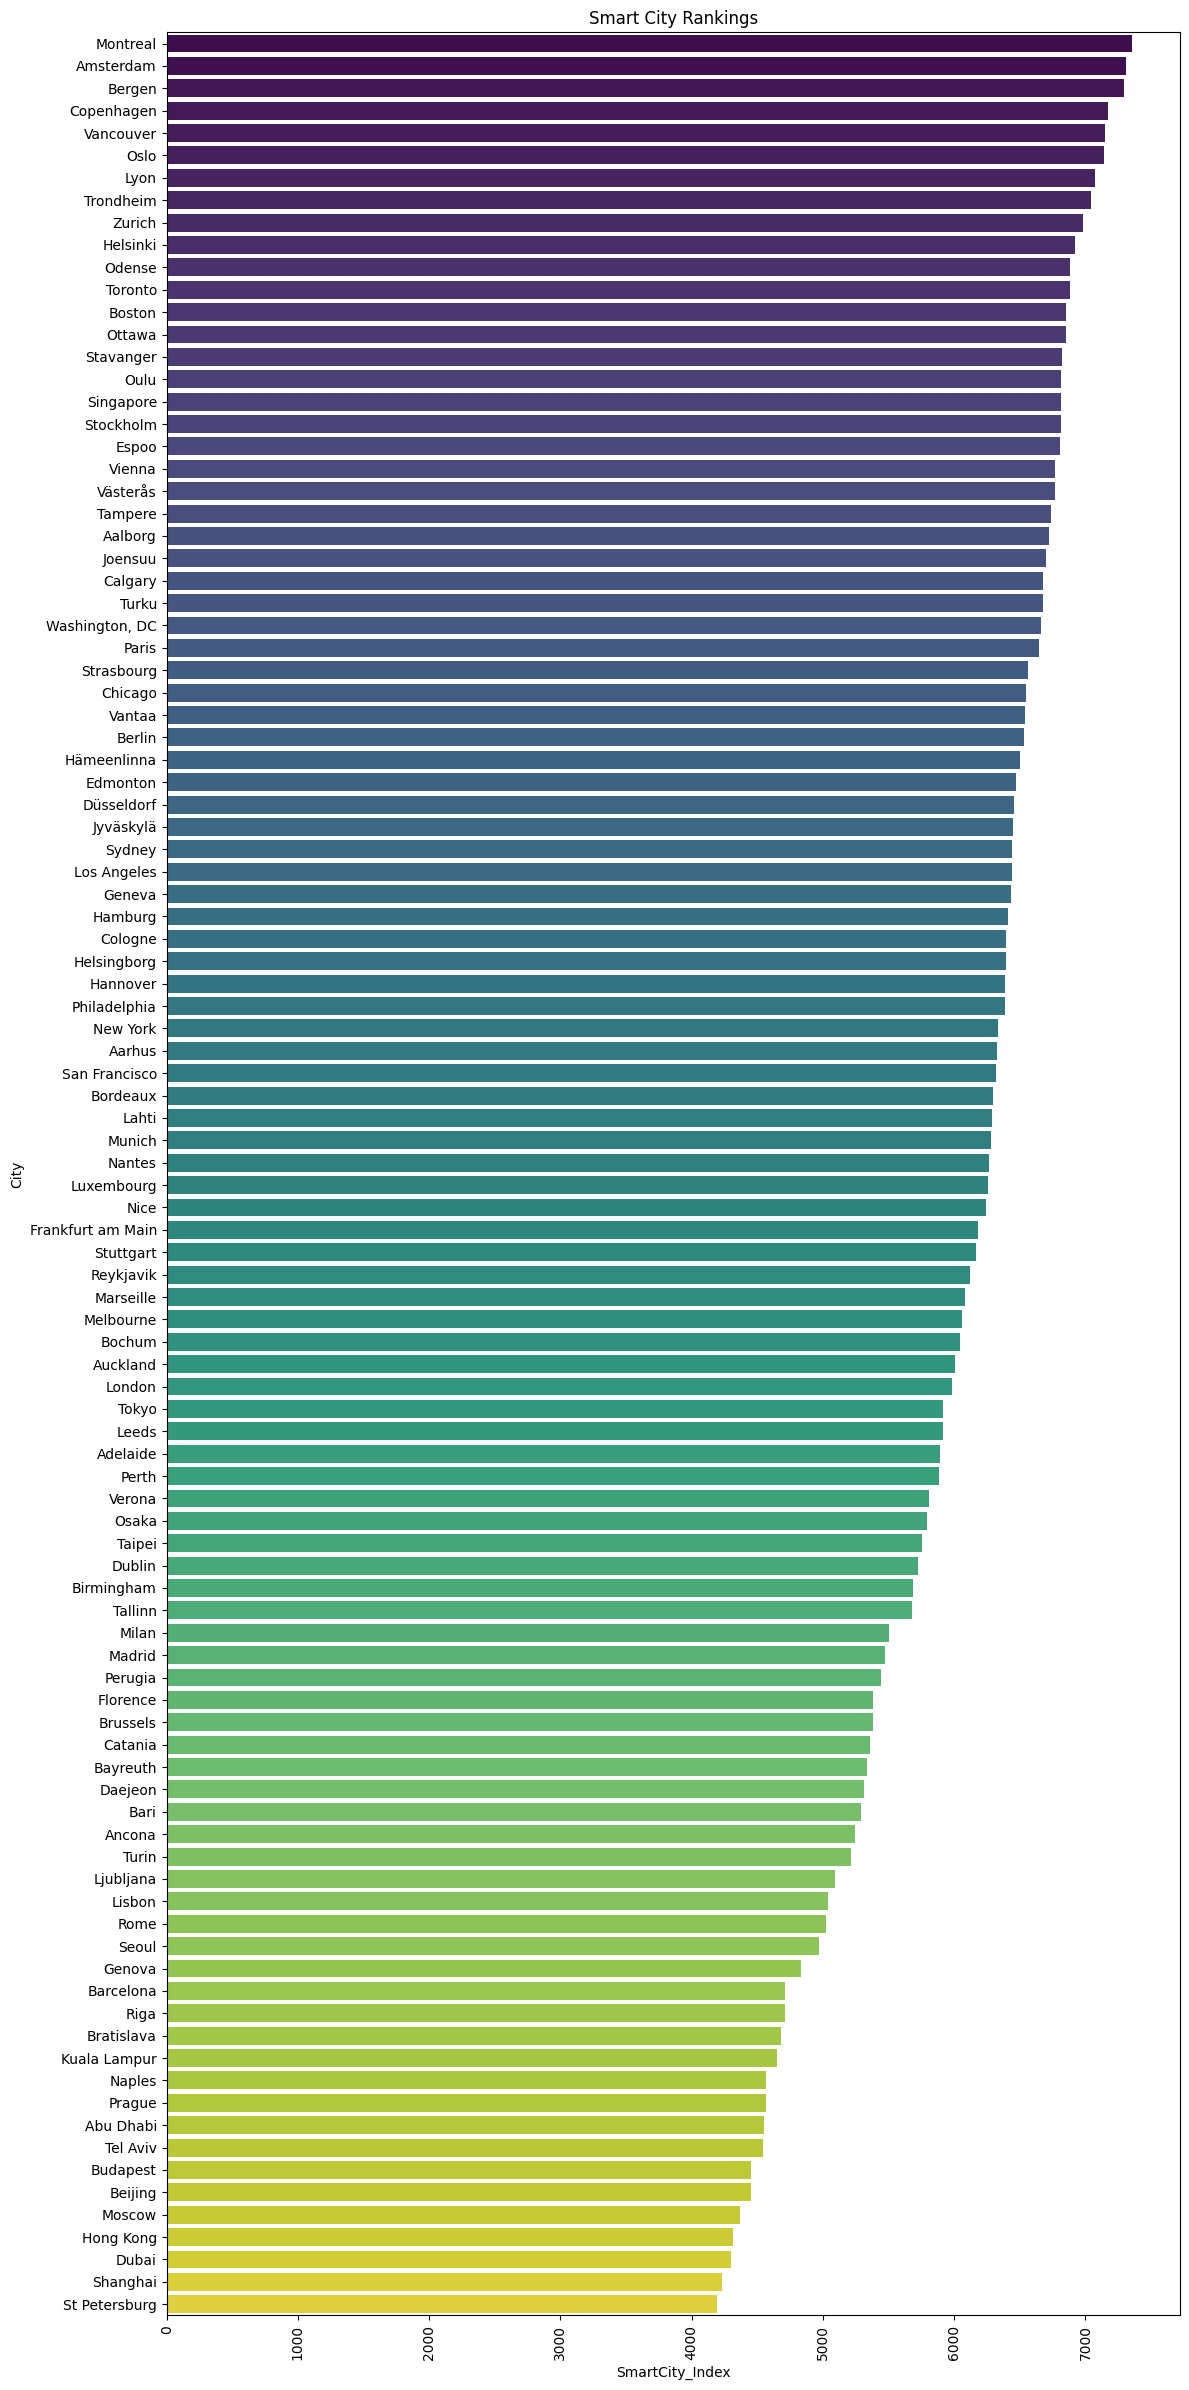

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rank the cities based on SmartCity_Index
smart_city_data['Rank'] = smart_city_data['SmartCity_Index'].rank(ascending=False)

# Sort the data by Rank
smart_city_data_sorted = smart_city_data.sort_values(by='Rank')

# Visualization 1: Bar plot of city rankings
plt.figure(figsize=(12, 24))  # Increase the height of the figure
sns.barplot(data=smart_city_data_sorted, x='SmartCity_Index', y='City', palette='viridis')
plt.title('Smart City Rankings')
plt.xlabel('SmartCity_Index')
plt.ylabel('City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Step 3: Apply Machine Learning for City Performance Clustering


---

**Explanation**:
Use a clustering algorithm to categorize cities into performance levels (High, Moderate, Low) based on their smart city indices.

**Outcome**:
Cities categorized into different performance levels.

**Instructions**:

* Select features for clustering.
* Standardize the features.
* Apply KMeans clustering.
* Add the cluster labels to the dataset.
* Only: 'Smart_Environment', 'Smart_Environment', 'Smart_People', 'Smart_Living'

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = ['Smart_Environment', 'Smart_Environment', 'Smart_People', 'Smart_Living']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(smart_city_data[features])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
smart_city_data['Performance_Level'] = kmeans.fit_predict(scaled_features)

# Map the cluster labels to meaningful names
performance_map = {0: 'Low', 1: 'Moderate', 2: 'High'}
smart_city_data['Performance_Level'] = smart_city_data['Performance_Level'].map(performance_map)


## Step 4: Generate Recommendations Based on Performance Levels


---


**Explanation**:
Provide tailored recommendations for each city based on its performance level and areas needing improvement.

**Outcome**:
A new column with specific recommendations for each city.

**Instructions**:

* Define the recommendation function.
* Apply the function to each row in the dataset.

In [ ]:
# Define the recommendation function
def get_recommendations(row):
    numerical_features = ['Smart_Environment', 'Smart_People', 'Smart_Living']
    if row['Performance_Level'] == 'High':
        return f"High performing city, maintain and improve further. Focus on {row[numerical_features].astype(float).idxmin()}." # Cast the Series to float
    elif row['Performance_Level'] == 'Moderate':
        return f"Moderate performance, focus on improvement. Improve {row[numerical_features].astype(float).idxmin()}." # Cast the Series to float
    else:
        return f"Low performance, take immediate action. Prioritize {row[numerical_features].astype(float).idxmin()}." # Cast the Series to float

# Apply the recommendation function to each row
smart_city_data['Recommendations'] = smart_city_data.apply(get_recommendations, axis=1)

# Combine city name and recommendations
smart_city_data['City_Name_Recommendation'] = smart_city_data.apply(
    lambda row: f"{row['City']} ({row['Recommendations']})", axis=1
)

# Display the first few rows to verify
smart_city_data.head()

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton,Rank,Performance_Level,Recommendations,City_Name_Recommendation
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666,6.0,High,"High performing city, maintain and improve fur...","Oslo (High performing city, maintain and impro..."
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823,3.0,High,"High performing city, maintain and improve fur...","Bergen (High performing city, maintain and imp..."
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839,2.0,High,"High performing city, maintain and improve fur...","Amsterdam (High performing city, maintain and ..."
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698,4.0,Low,"Low performance, take immediate action. Priori...","Copenhagen (Low performance, take immediate ac..."
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340,18.0,Low,"Low performance, take immediate action. Priori...","Stockholm (Low performance, take immediate act..."


## Step 5: Create a Table of Cities and Their Performance Levels


---



**Explanation**:
Create a table that shows the city name, SmartCity_Index, performance level, and recommendations.

**Outcome**:
A comprehensive table with city performance details and recommendations.

**Instructions**:

* Create a DataFrame with the relevant columns.
* Display the table.

In [ ]:
# Create a DataFrame with city performance details and recommendations
performance_table = smart_city_data[['City', 'SmartCity_Index', 'Performance_Level', 'Recommendations']]

# Display the table
performance_table.head(10)


,City,SmartCity_Index,Performance_Level,Recommendations
0,Oslo,7138,High,"High performing city, maintain and improve fur..."
1,Bergen,7296,High,"High performing city, maintain and improve fur..."
2,Amsterdam,7311,High,"High performing city, maintain and improve fur..."
3,Copenhagen,7171,Low,"Low performance, take immediate action. Priori..."
4,Stockholm,6812,Low,"Low performance, take immediate action. Priori..."
5,Montreal,7353,High,"High performing city, maintain and improve fur..."
6,Vienna,6771,High,"High performing city, maintain and improve fur..."
7,Odense,6886,Low,"Low performance, take immediate action. Priori..."
8,Singapore,6813,High,"High performing city, maintain and improve fur..."
9,Boston,6852,High,"High performing city, maintain and improve fur..."


## Step 6: Visualize the Performance Levels of Cities

---

**Explanation**:
Create a scatter plot to visualize the performance levels of cities, ensuring that city names are clear and not overlapping.

**Outcome**:
A scatter plot with clearly labeled city names, showing performance levels.

**Instructions**:

* Create a scatter plot with city names and performance levels.
* Adjust text positions to avoid overlap using the adjust_text library.

In [ ]:
!pip install adjustText

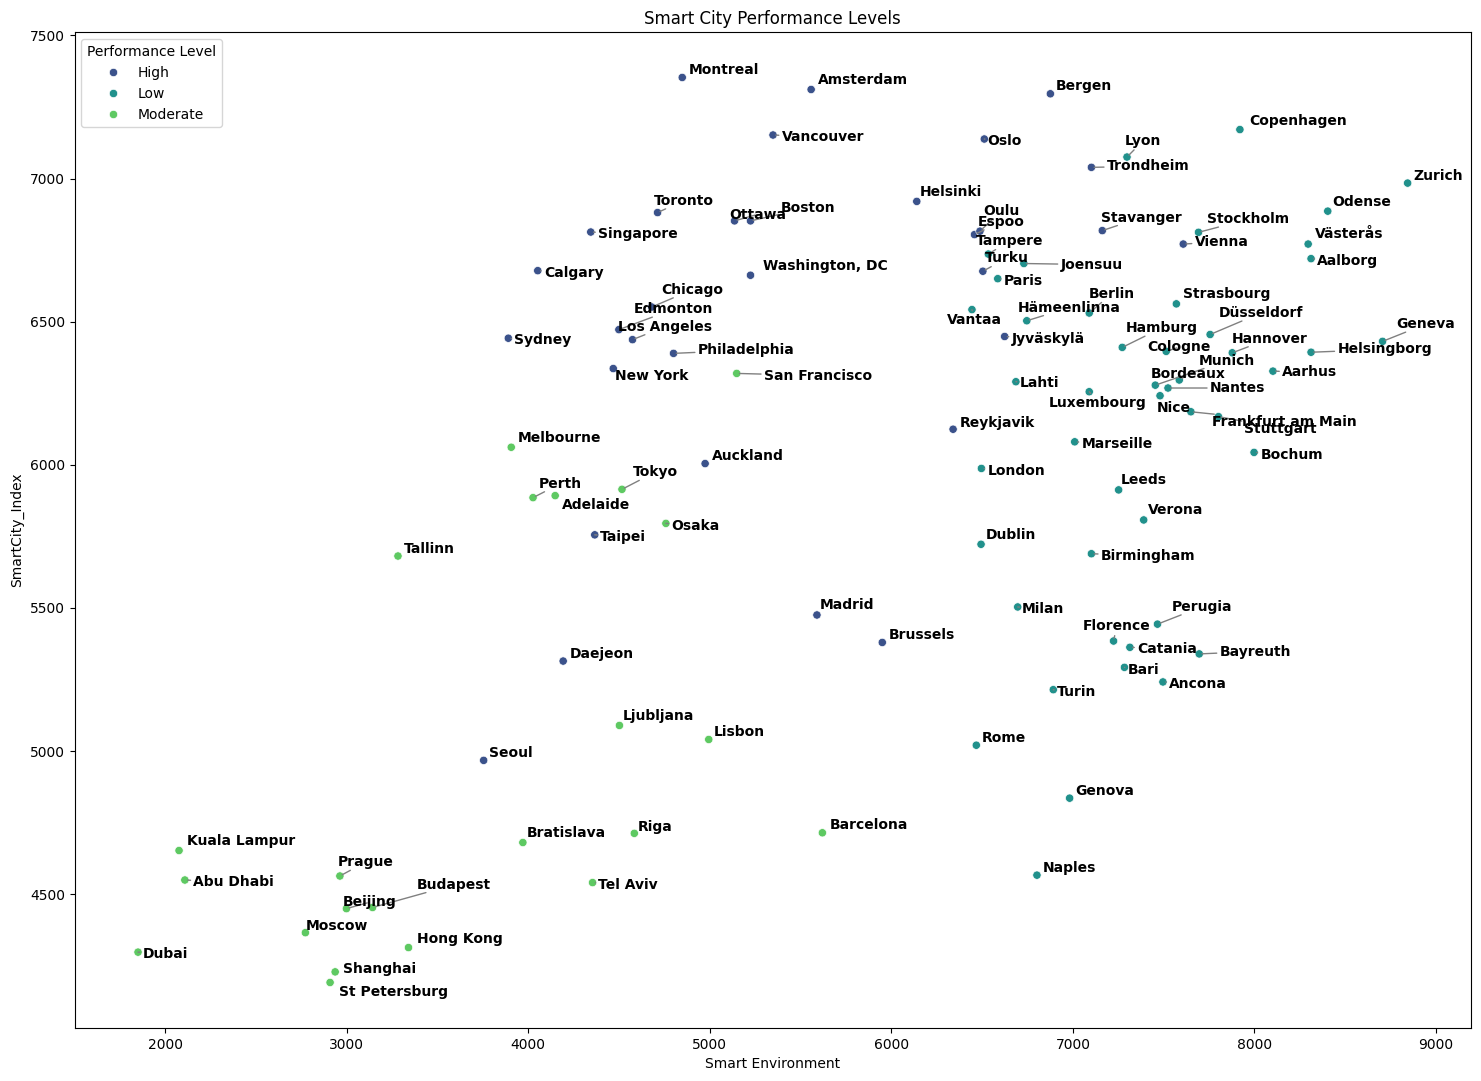

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(16, 12))

# Plot the cities in a scatter plot
scatter_plot = sns.scatterplot(data=smart_city_data, x='Smart_Environment', y='SmartCity_Index', hue='Performance_Level', palette='viridis')

# Add annotations with city names and use adjust_text to avoid overlap
texts = []
for line in range(0, smart_city_data.shape[0]):
    texts.append(plt.text(smart_city_data.Smart_Environment[line], smart_city_data.SmartCity_Index[line],
                          smart_city_data.City[line], horizontalalignment='left', size='medium', color='black', weight='semibold'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

plt.title('Smart City Performance Levels')
plt.xlabel('Smart Environment')
plt.ylabel('SmartCity_Index')
plt.legend(title='Performance Level')
plt.tight_layout(pad=5.0)
plt.show()


In [ ]:
import plotly.express as px

# Create a scatter plot with city names and performance levels using Plotly Express
fig = px.scatter(smart_city_data, x='Smart_Environment', y='SmartCity_Index', color='Performance_Level',
                 hover_name='City', title='Smart City Performance Levels')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Smart Environment',
    yaxis_title='SmartCity_Index',
    legend_title='Performance Level'
)

# Show the plot
fig.show()

# Ethics and AI

* Ethical dilemmas in AI often involve concerns about data privacy.
* AI systems can result in biased outcomes, such as in predictive policing or healthcare, raising fairness and equity issues.
Potential Misuse: AI can be misused in areas like surveillance, requiring careful consideration of ethical implications.
* These points highlight the importance of weighing the potential benefits and harms of AI systems.
* Use frameworks like consequentialism and deontology to navigate complex ethical dilemmas in AI.
* Balancing Benefits and Harms: Analyze both potential benefits and harms, especially regarding biases and fairness.
* Resolving ethical dilemmas is an ongoing process that requires input from diverse stakeholders, including developers and the public.
* Forming diverse teams and engaging with ethical review boards helps ensure responsible innovation.
* Continuously test AI models against diverse datasets to ensure they are free from bias.
* Prioritize data privacy by using anonymized datasets and implementing robust data protection measures.
* Involve the public in discussions about AI systems to ensure transparency and accountability.
* Visualizing the ethical decision-making process ensures transparency and accountability.
* Flow charts and decision trees help map out AI decisions, showing the potential impact of each decision.
* Visual tools help stakeholders understand how AI systems work and the ethical considerations behind decisions.